# Project 1

### Completed by: Phan Anh Nguyen

In [284]:
import os
import numpy as np
import pandas as pd
import time
import warnings
import sklearn.metrics as sm
from sklearn import preprocessing as pr

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from show_images import show_images
from LRGradientDescent import LogisticRegressionGradientDescent
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform


In [285]:
def sigmoid_pos(x):
        z = np.exp(-x)
        return (1 / (1 + z))
def sigmoid_neg(x):
        # if x is less than zero then z will be small, denom can't be
        # zero because it's 1+z.
        z = np.exp(x)
        return (z / (1 + z))

In [286]:
%matplotlib inline

# Problem 1a: Toy Data

Checking loss and grad at all zeros w vector


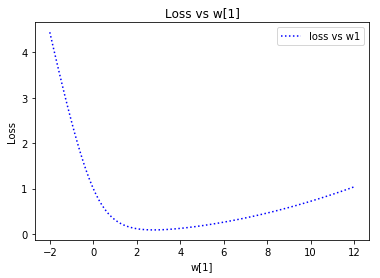

In [283]:
N = 10
x_NF = np.hstack([np.linspace(-2, -1, 5), np.linspace(1,2, 5)])[:,np.newaxis]
y_N = np.hstack([np.zeros(5), 1.0 * np.ones(5)])

lr = LogisticRegressionGradientDescent( alpha=0.1, step_size=1.0, init_w_recipe='zeros')

# Prepare features by inserting column of all 1
xbias_NG = lr.insert_final_col_of_all_ones(x_NF)

print("Checking loss and grad at all zeros w vector")

w_loss = np.linspace(-2,12,100)[:,np.newaxis]
w_G = np.hstack([w_loss, np.zeros(100)[:,np.newaxis]])
loss = []
grad = []
for i in w_G: 
    loss.append(lr.calc_loss(i, xbias_NG, y_N))
    grad.append(lr.calc_grad(i, xbias_NG, y_N)[0])
plt.plot(w_loss, loss, 'b:', label = 'loss vs w1')
plt.xlabel('w[1]')
plt.ylabel('Loss')
plt.title('Loss vs w[1]')
plt.legend()
# print(loss)
# print(grad)


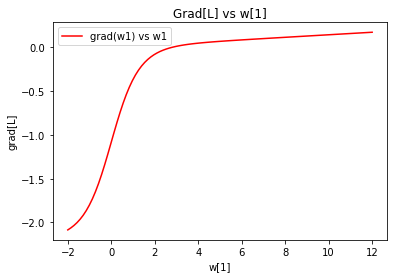

In [288]:
plt.plot(w_loss, grad, 'r-', label = 'grad(w1) vs w1')
plt.xlabel('w[1]')
plt.ylabel('grad[L]')
plt.title('Grad[L] vs w[1]')
plt.legend()

## Problem 1b

Initializing w_G with 2 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.541011  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.282809  avg_L1_norm_grad         0.164186  w[0]    1.082 bias    0.000
iter    2/10000  loss         0.196043  avg_L1_norm_grad         0.103757  w[0]    1.410 bias   -0.000
iter    3/10000  loss         0.159016  avg_L1_norm_grad         0.075811  w[0]    1.618 bias   -0.000
iter    4/10000  loss         0.138602  avg_L1_norm_grad         0.059322  w[0]    1.770 bias   -0.000
iter    5/10000  loss         0.125859  avg_L1_norm_grad         0.048338  w[0]    1.888 bias    0.000
iter    6/10000  loss         0.117289  avg_L1_norm_grad         0.040459  w[0]    1.985 bias    0.000
iter    7/10000  loss         0.111230  avg_L1_norm_grad         0.034519  w[0]    2.066 bias    0.000
iter    8/10000  loss         0.106788  avg_L1_norm_grad    

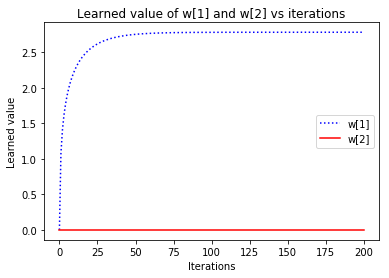

In [289]:
lr.fit(x_NF, y_N)
trace_w1 = []
trace_w2 = []
# print(lr.trace_steps)
for i in lr.trace_w:
    trace_w1.append(i[0])
    trace_w2.append(i[1])
plt.plot(lr.trace_steps, trace_w1, 'b:', label = 'w[1]')
plt.plot(lr.trace_steps, trace_w2, 'r-', label = 'w[2]')
plt.xlabel('Iterations')
plt.ylabel('Learned value')
plt.title('Learned value of w[1] and w[2] vs iterations')
plt.legend()

## Problem 1c

Initializing w_G with 2 features using recipe: uniform_-1_to_1
Running up to 10000 iters of gradient descent with step_size 1
iter    0/10000  loss         0.932814  avg_L1_norm_grad         0.579579  w[0]    0.098 bias    0.430
iter    1/10000  loss         0.285311  avg_L1_norm_grad         0.192917  w[0]    1.099 bias    0.272
iter    2/10000  loss         0.196351  avg_L1_norm_grad         0.119929  w[0]    1.427 bias    0.214
iter    3/10000  loss         0.158926  avg_L1_norm_grad         0.086791  w[0]    1.633 bias    0.180
iter    4/10000  loss         0.138434  avg_L1_norm_grad         0.067501  w[0]    1.783 bias    0.157
iter    5/10000  loss         0.125692  avg_L1_norm_grad         0.054780  w[0]    1.900 bias    0.139
iter    6/10000  loss         0.117144  avg_L1_norm_grad         0.045726  w[0]    1.996 bias    0.125
iter    7/10000  loss         0.111109  avg_L1_norm_grad         0.038941  w[0]    2.076 bias    0.114
iter    8/10000  loss         0.106691  avg_L1_nor

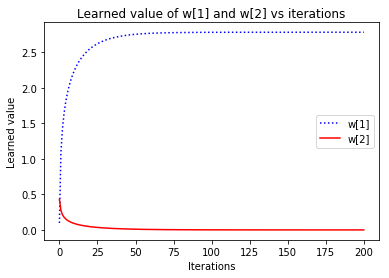

In [354]:
lr2 = LogisticRegressionGradientDescent(alpha=0.1, step_size=1.0, init_w_recipe='uniform_-1_to_1')
lr2.fit(x_NF, y_N)
trace_w1_2 = []
trace_w2_2 = []
# print(lr.trace_steps)
for i in lr2.trace_w:
    trace_w1_2.append(i[0])
    trace_w2_2.append(i[1])
plt.plot(lr2.trace_steps, trace_w1_2, 'b:', label = 'w[1]')
plt.plot(lr2.trace_steps, trace_w2_2, 'r-', label = 'w[2]')
plt.xlabel('Iterations')
plt.ylabel('Learned value')
plt.title('Learned value of w[1] and w[2] vs iterations')
plt.legend()

## Problem 2a:


In [33]:
x_NF_p2 = np.loadtxt('data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
y_N_p2 = np.loadtxt('data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
x_tr_NF = x_NF_p2[2000:]
y_tr_NF = y_N_p2[2000:]
x_va_NF = x_NF_p2[:2000]
y_va_NF = y_N_p2[:2000]
print(x_tr_NF.shape)
print(x_va_NF.shape)

(9800, 784)
(2000, 784)


In [18]:
#Fit the correct step size
lr_digit = LogisticRegressionGradientDescent(alpha=10.0, step_size=0.25, init_w_recipe='zeros')
lr_digit.fit(x_tr_NF, y_tr_NF) 

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.25
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024676  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.741783  avg_L1_norm_grad         0.036433  w[0]   -0.001 bias    0.001
iter    2/10000  loss         1.132563  avg_L1_norm_grad         0.116754  w[0]    0.003 bias    0.047
iter    3/10000  loss         3.570826  avg_L1_norm_grad         0.150274  w[0]   -0.009 bias   -0.075
iter    4/10000  loss         2.157162  avg_L1_norm_grad         0.154230  w[0]    0.008 bias    0.105
iter    5/10000  loss         3.086198  avg_L1_norm_grad         0.148058  w[0]   -0.009 bias   -0.059
iter    6/10000  loss         1.398393  avg_L1_norm_grad         0.124772  w[0]    0.008 bias    0.118
iter    7/10000  loss         1.542620  avg_L1_norm_grad         0.118735  w[0]   -0.006 bias   -0.014
iter    8/10000  loss         0.962242  avg_L1_norm_gra

iter  620/10000  loss         0.108248  avg_L1_norm_grad         0.000234  w[0]   -0.046 bias    0.574
iter  621/10000  loss         0.108230  avg_L1_norm_grad         0.000234  w[0]   -0.046 bias    0.574
iter  640/10000  loss         0.107906  avg_L1_norm_grad         0.000227  w[0]   -0.047 bias    0.582
iter  641/10000  loss         0.107890  avg_L1_norm_grad         0.000227  w[0]   -0.047 bias    0.582
iter  660/10000  loss         0.107584  avg_L1_norm_grad         0.000221  w[0]   -0.047 bias    0.590
iter  661/10000  loss         0.107568  avg_L1_norm_grad         0.000221  w[0]   -0.047 bias    0.590
iter  680/10000  loss         0.107279  avg_L1_norm_grad         0.000215  w[0]   -0.048 bias    0.598
iter  681/10000  loss         0.107264  avg_L1_norm_grad         0.000215  w[0]   -0.048 bias    0.598
iter  700/10000  loss         0.106991  avg_L1_norm_grad         0.000209  w[0]   -0.048 bias    0.605
iter  701/10000  loss         0.106977  avg_L1_norm_grad         0.000209

iter 1420/10000  loss         0.102153  avg_L1_norm_grad         0.000095  w[0]   -0.054 bias    0.805
iter 1421/10000  loss         0.102150  avg_L1_norm_grad         0.000094  w[0]   -0.054 bias    0.805
iter 1440/10000  loss         0.102096  avg_L1_norm_grad         0.000093  w[0]   -0.054 bias    0.809
iter 1441/10000  loss         0.102093  avg_L1_norm_grad         0.000093  w[0]   -0.054 bias    0.810
iter 1460/10000  loss         0.102041  avg_L1_norm_grad         0.000091  w[0]   -0.054 bias    0.813
iter 1461/10000  loss         0.102038  avg_L1_norm_grad         0.000091  w[0]   -0.054 bias    0.814
iter 1480/10000  loss         0.101988  avg_L1_norm_grad         0.000089  w[0]   -0.054 bias    0.818
iter 1481/10000  loss         0.101986  avg_L1_norm_grad         0.000089  w[0]   -0.054 bias    0.818
iter 1500/10000  loss         0.101937  avg_L1_norm_grad         0.000088  w[0]   -0.054 bias    0.822
iter 1501/10000  loss         0.101935  avg_L1_norm_grad         0.000088

iter 2220/10000  loss         0.100902  avg_L1_norm_grad         0.000047  w[0]   -0.052 bias    0.937
iter 2221/10000  loss         0.100902  avg_L1_norm_grad         0.000047  w[0]   -0.052 bias    0.937
iter 2240/10000  loss         0.100888  avg_L1_norm_grad         0.000047  w[0]   -0.052 bias    0.939
iter 2241/10000  loss         0.100887  avg_L1_norm_grad         0.000047  w[0]   -0.052 bias    0.939
iter 2260/10000  loss         0.100873  avg_L1_norm_grad         0.000046  w[0]   -0.052 bias    0.942
iter 2261/10000  loss         0.100873  avg_L1_norm_grad         0.000046  w[0]   -0.052 bias    0.942
iter 2280/10000  loss         0.100859  avg_L1_norm_grad         0.000045  w[0]   -0.052 bias    0.944
iter 2281/10000  loss         0.100859  avg_L1_norm_grad         0.000045  w[0]   -0.052 bias    0.944
iter 2300/10000  loss         0.100846  avg_L1_norm_grad         0.000044  w[0]   -0.051 bias    0.947
iter 2301/10000  loss         0.100845  avg_L1_norm_grad         0.000044

iter 3020/10000  loss         0.100552  avg_L1_norm_grad         0.000026  w[0]   -0.050 bias    1.020
iter 3021/10000  loss         0.100552  avg_L1_norm_grad         0.000026  w[0]   -0.050 bias    1.020
iter 3040/10000  loss         0.100548  avg_L1_norm_grad         0.000025  w[0]   -0.050 bias    1.021
iter 3041/10000  loss         0.100548  avg_L1_norm_grad         0.000025  w[0]   -0.050 bias    1.021
iter 3060/10000  loss         0.100543  avg_L1_norm_grad         0.000025  w[0]   -0.050 bias    1.023
iter 3061/10000  loss         0.100543  avg_L1_norm_grad         0.000025  w[0]   -0.050 bias    1.023
iter 3080/10000  loss         0.100539  avg_L1_norm_grad         0.000025  w[0]   -0.050 bias    1.025
iter 3081/10000  loss         0.100539  avg_L1_norm_grad         0.000025  w[0]   -0.050 bias    1.025
iter 3100/10000  loss         0.100535  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.026
iter 3101/10000  loss         0.100535  avg_L1_norm_grad         0.000024

iter 3820/10000  loss         0.100440  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.074
iter 3821/10000  loss         0.100440  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.074
iter 3840/10000  loss         0.100439  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.075
iter 3841/10000  loss         0.100439  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.075
iter 3860/10000  loss         0.100437  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.076
iter 3861/10000  loss         0.100437  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.076
iter 3880/10000  loss         0.100436  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.077
iter 3881/10000  loss         0.100436  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.077
iter 3900/10000  loss         0.100434  avg_L1_norm_grad         0.000014  w[0]   -0.049 bias    1.078
iter 3901/10000  loss         0.100434  avg_L1_norm_grad         0.000014

iter 4620/10000  loss         0.100401  avg_L1_norm_grad         0.000009  w[0]   -0.049 bias    1.111
iter 4621/10000  loss         0.100401  avg_L1_norm_grad         0.000009  w[0]   -0.049 bias    1.111
iter 4640/10000  loss         0.100401  avg_L1_norm_grad         0.000009  w[0]   -0.049 bias    1.111
iter 4641/10000  loss         0.100401  avg_L1_norm_grad         0.000008  w[0]   -0.049 bias    1.111
iter 4660/10000  loss         0.100400  avg_L1_norm_grad         0.000008  w[0]   -0.049 bias    1.112
iter 4661/10000  loss         0.100400  avg_L1_norm_grad         0.000008  w[0]   -0.049 bias    1.112
iter 4680/10000  loss         0.100400  avg_L1_norm_grad         0.000008  w[0]   -0.049 bias    1.113
iter 4681/10000  loss         0.100400  avg_L1_norm_grad         0.000008  w[0]   -0.049 bias    1.113
iter 4700/10000  loss         0.100399  avg_L1_norm_grad         0.000008  w[0]   -0.049 bias    1.113
iter 4701/10000  loss         0.100399  avg_L1_norm_grad         0.000008

iter 5420/10000  loss         0.100387  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.135
iter 5421/10000  loss         0.100387  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.135
iter 5440/10000  loss         0.100387  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.136
iter 5441/10000  loss         0.100387  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.136
iter 5460/10000  loss         0.100386  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.136
iter 5461/10000  loss         0.100386  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.136
iter 5480/10000  loss         0.100386  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.137
iter 5481/10000  loss         0.100386  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.137
iter 5500/10000  loss         0.100386  avg_L1_norm_grad         0.000005  w[0]   -0.050 bias    1.137
iter 5501/10000  loss         0.100386  avg_L1_norm_grad         0.000005

iter 6220/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.152
iter 6221/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.152
iter 6240/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 6241/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 6260/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 6261/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 6280/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 6281/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 6300/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.154
iter 6301/10000  loss         0.100381  avg_L1_norm_grad         0.000003

iter 7020/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.164
iter 7021/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.164
iter 7040/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.164
iter 7041/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.164
iter 7060/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.165
iter 7061/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.165
iter 7080/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.165
iter 7081/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.165
iter 7100/10000  loss         0.100379  avg_L1_norm_grad         0.000002  w[0]   -0.050 bias    1.165
iter 7101/10000  loss         0.100379  avg_L1_norm_grad         0.000002

In [307]:
# Get values
lr_correct_steps = lr_digit.trace_steps
lr_correct_loss = lr_digit.trace_loss
lr_w_bias = []
lr_w_154 = []
for i in lr_digit.trace_w:
    lr_w_bias.append(i[-1])
    lr_w_154.append(i[153])
print(len(lr_digit.trace_w))

7496


In [310]:
# Fit too large step size + get values
lr_digit_big = LogisticRegressionGradientDescent(alpha=10.0, step_size=0.7, init_w_recipe='zeros')
lr_digit_big.fit(x_tr_NF, y_tr_NF) 


Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.7
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024676  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.644910  avg_L1_norm_grad         0.067787  w[0]   -0.002 bias    0.003
iter    2/10000  loss         7.740358  avg_L1_norm_grad         0.168211  w[0]    0.020 bias    0.232
iter    3/10000  loss        12.392573  avg_L1_norm_grad         0.152022  w[0]   -0.032 bias   -0.270
iter    4/10000  loss         3.513836  avg_L1_norm_grad         0.156296  w[0]    0.017 bias    0.237
iter    5/10000  loss        11.062118  avg_L1_norm_grad         0.152024  w[0]   -0.031 bias   -0.227
iter    6/10000  loss         1.942732  avg_L1_norm_grad         0.097756  w[0]    0.017 bias    0.281
iter    7/10000  loss         2.617574  avg_L1_norm_grad         0.110345  w[0]   -0.012 bias   -0.005
iter    8/10000  loss         2.759826  avg_L1_norm_grad

iter  620/10000  loss         0.101371  avg_L1_norm_grad         0.000067  w[0]   -0.057 bias    0.855
iter  621/10000  loss         0.101367  avg_L1_norm_grad         0.000067  w[0]   -0.057 bias    0.856
iter  640/10000  loss         0.101291  avg_L1_norm_grad         0.000064  w[0]   -0.057 bias    0.865
iter  641/10000  loss         0.101288  avg_L1_norm_grad         0.000064  w[0]   -0.057 bias    0.865
iter  660/10000  loss         0.101219  avg_L1_norm_grad         0.000061  w[0]   -0.056 bias    0.874
iter  661/10000  loss         0.101216  avg_L1_norm_grad         0.000061  w[0]   -0.056 bias    0.874
iter  680/10000  loss         0.101153  avg_L1_norm_grad         0.000058  w[0]   -0.056 bias    0.883
iter  681/10000  loss         0.101150  avg_L1_norm_grad         0.000058  w[0]   -0.056 bias    0.883
iter  700/10000  loss         0.101093  avg_L1_norm_grad         0.000056  w[0]   -0.055 bias    0.891
iter  701/10000  loss         0.101090  avg_L1_norm_grad         0.000056

iter 1420/10000  loss         0.100428  avg_L1_norm_grad         0.000013  w[0]   -0.050 bias    1.077
iter 1421/10000  loss         0.100428  avg_L1_norm_grad         0.000013  w[0]   -0.050 bias    1.077
iter 1440/10000  loss         0.100425  avg_L1_norm_grad         0.000012  w[0]   -0.050 bias    1.080
iter 1441/10000  loss         0.100425  avg_L1_norm_grad         0.000012  w[0]   -0.050 bias    1.080
iter 1460/10000  loss         0.100422  avg_L1_norm_grad         0.000012  w[0]   -0.050 bias    1.083
iter 1461/10000  loss         0.100422  avg_L1_norm_grad         0.000012  w[0]   -0.050 bias    1.083
iter 1480/10000  loss         0.100419  avg_L1_norm_grad         0.000011  w[0]   -0.050 bias    1.086
iter 1481/10000  loss         0.100419  avg_L1_norm_grad         0.000011  w[0]   -0.050 bias    1.086
iter 1500/10000  loss         0.100416  avg_L1_norm_grad         0.000011  w[0]   -0.050 bias    1.089
iter 1501/10000  loss         0.100416  avg_L1_norm_grad         0.000011

iter 2220/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.150
iter 2221/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.150
iter 2240/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.151
iter 2241/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.151
iter 2260/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.152
iter 2261/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.152
iter 2280/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 2281/10000  loss         0.100381  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.153
iter 2300/10000  loss         0.100380  avg_L1_norm_grad         0.000003  w[0]   -0.050 bias    1.154
iter 2301/10000  loss         0.100380  avg_L1_norm_grad         0.000003

iter 3020/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.176
iter 3021/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.176
iter 3040/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.177
iter 3041/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.177
iter 3060/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.177
iter 3061/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.177
iter 3080/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.177
iter 3081/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.178
iter 3100/10000  loss         0.100378  avg_L1_norm_grad         0.000001  w[0]   -0.051 bias    1.178
iter 3101/10000  loss         0.100378  avg_L1_norm_grad         0.000001

In [315]:
lr_big_steps = lr_digit_big.trace_steps
lr_big_loss = lr_digit_big.trace_loss
lr_big_w_bias = []
lr_big_w_154 = []
for i in lr_digit_big.trace_w:
    lr_big_w_bias.append(i[-1])
    lr_big_w_154.append(i[153])
print(len(lr_big_w_bias))
print(len(lr_digit_big.trace_steps))

3580
3580


In [309]:
# Fit too small + get values
lr_digit_small = LogisticRegressionGradientDescent(alpha=10.0, step_size=0.1, init_w_recipe='zeros')
lr_digit_small.fit(x_tr_NF, y_tr_NF) 
lr_small_steps = lr_digit_small.trace_steps
lr_small_loss = lr_digit_small.trace_loss
lr_small_w_bias = []
lr_small_w_154 = []
for i in lr_digit_small.trace_w:
    lr_small_w_bias.append(i[-1])
    lr_small_w_154.append(i[153])

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024676  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.870389  avg_L1_norm_grad         0.024782  w[0]   -0.000 bias    0.000
iter    2/10000  loss         0.773694  avg_L1_norm_grad         0.021132  w[0]    0.000 bias    0.009
iter    3/10000  loss         0.700361  avg_L1_norm_grad         0.022997  w[0]   -0.000 bias    0.006
iter    4/10000  loss         0.642664  avg_L1_norm_grad         0.020912  w[0]    0.001 bias    0.016
iter    5/10000  loss         0.595566  avg_L1_norm_grad         0.021399  w[0]   -0.000 bias    0.011
iter    6/10000  loss         0.554936  avg_L1_norm_grad         0.018142  w[0]    0.001 bias    0.021
iter    7/10000  loss         0.520284  avg_L1_norm_grad         0.016834  w[0]    0.000 bias    0.017
iter    8/10000  loss         0.490452  avg_L1_norm_grad

iter  620/10000  loss         0.122824  avg_L1_norm_grad         0.000505  w[0]   -0.022 bias    0.372
iter  621/10000  loss         0.122791  avg_L1_norm_grad         0.000505  w[0]   -0.022 bias    0.373
iter  640/10000  loss         0.122162  avg_L1_norm_grad         0.000493  w[0]   -0.023 bias    0.378
iter  641/10000  loss         0.122129  avg_L1_norm_grad         0.000492  w[0]   -0.023 bias    0.379
iter  660/10000  loss         0.121531  avg_L1_norm_grad         0.000481  w[0]   -0.024 bias    0.384
iter  661/10000  loss         0.121501  avg_L1_norm_grad         0.000481  w[0]   -0.024 bias    0.384
iter  680/10000  loss         0.120931  avg_L1_norm_grad         0.000470  w[0]   -0.025 bias    0.390
iter  681/10000  loss         0.120902  avg_L1_norm_grad         0.000469  w[0]   -0.025 bias    0.390
iter  700/10000  loss         0.120359  avg_L1_norm_grad         0.000459  w[0]   -0.025 bias    0.395
iter  701/10000  loss         0.120331  avg_L1_norm_grad         0.000459

iter 1420/10000  loss         0.109323  avg_L1_norm_grad         0.000255  w[0]   -0.043 bias    0.552
iter 1421/10000  loss         0.109314  avg_L1_norm_grad         0.000255  w[0]   -0.043 bias    0.552
iter 1440/10000  loss         0.109157  avg_L1_norm_grad         0.000252  w[0]   -0.043 bias    0.556
iter 1441/10000  loss         0.109149  avg_L1_norm_grad         0.000252  w[0]   -0.043 bias    0.556
iter 1460/10000  loss         0.108995  avg_L1_norm_grad         0.000249  w[0]   -0.043 bias    0.559
iter 1461/10000  loss         0.108987  avg_L1_norm_grad         0.000249  w[0]   -0.043 bias    0.559
iter 1480/10000  loss         0.108838  avg_L1_norm_grad         0.000246  w[0]   -0.044 bias    0.562
iter 1481/10000  loss         0.108830  avg_L1_norm_grad         0.000246  w[0]   -0.044 bias    0.563
iter 1500/10000  loss         0.108684  avg_L1_norm_grad         0.000243  w[0]   -0.044 bias    0.566
iter 1501/10000  loss         0.108677  avg_L1_norm_grad         0.000243

iter 2220/10000  loss         0.104934  avg_L1_norm_grad         0.000166  w[0]   -0.051 bias    0.670
iter 2221/10000  loss         0.104930  avg_L1_norm_grad         0.000166  w[0]   -0.051 bias    0.670
iter 2240/10000  loss         0.104864  avg_L1_norm_grad         0.000164  w[0]   -0.051 bias    0.672
iter 2241/10000  loss         0.104861  avg_L1_norm_grad         0.000164  w[0]   -0.051 bias    0.673
iter 2260/10000  loss         0.104796  avg_L1_norm_grad         0.000163  w[0]   -0.051 bias    0.675
iter 2261/10000  loss         0.104792  avg_L1_norm_grad         0.000163  w[0]   -0.051 bias    0.675
iter 2280/10000  loss         0.104729  avg_L1_norm_grad         0.000161  w[0]   -0.051 bias    0.677
iter 2281/10000  loss         0.104725  avg_L1_norm_grad         0.000161  w[0]   -0.051 bias    0.677
iter 2300/10000  loss         0.104663  avg_L1_norm_grad         0.000160  w[0]   -0.051 bias    0.680
iter 2301/10000  loss         0.104660  avg_L1_norm_grad         0.000160

iter 3020/10000  loss         0.102923  avg_L1_norm_grad         0.000117  w[0]   -0.053 bias    0.758
iter 3021/10000  loss         0.102922  avg_L1_norm_grad         0.000117  w[0]   -0.053 bias    0.758
iter 3040/10000  loss         0.102888  avg_L1_norm_grad         0.000116  w[0]   -0.053 bias    0.760
iter 3041/10000  loss         0.102887  avg_L1_norm_grad         0.000116  w[0]   -0.053 bias    0.760
iter 3060/10000  loss         0.102854  avg_L1_norm_grad         0.000115  w[0]   -0.053 bias    0.762
iter 3061/10000  loss         0.102852  avg_L1_norm_grad         0.000115  w[0]   -0.053 bias    0.762
iter 3080/10000  loss         0.102820  avg_L1_norm_grad         0.000114  w[0]   -0.053 bias    0.764
iter 3081/10000  loss         0.102819  avg_L1_norm_grad         0.000114  w[0]   -0.053 bias    0.764
iter 3100/10000  loss         0.102787  avg_L1_norm_grad         0.000113  w[0]   -0.053 bias    0.766
iter 3101/10000  loss         0.102785  avg_L1_norm_grad         0.000113

iter 3820/10000  loss         0.101874  avg_L1_norm_grad         0.000086  w[0]   -0.053 bias    0.828
iter 3821/10000  loss         0.101873  avg_L1_norm_grad         0.000086  w[0]   -0.053 bias    0.828
iter 3840/10000  loss         0.101855  avg_L1_norm_grad         0.000085  w[0]   -0.053 bias    0.829
iter 3841/10000  loss         0.101854  avg_L1_norm_grad         0.000085  w[0]   -0.053 bias    0.829
iter 3860/10000  loss         0.101837  avg_L1_norm_grad         0.000084  w[0]   -0.053 bias    0.831
iter 3861/10000  loss         0.101836  avg_L1_norm_grad         0.000084  w[0]   -0.053 bias    0.831
iter 3880/10000  loss         0.101818  avg_L1_norm_grad         0.000084  w[0]   -0.053 bias    0.832
iter 3881/10000  loss         0.101817  avg_L1_norm_grad         0.000084  w[0]   -0.053 bias    0.832
iter 3900/10000  loss         0.101800  avg_L1_norm_grad         0.000083  w[0]   -0.053 bias    0.834
iter 3901/10000  loss         0.101799  avg_L1_norm_grad         0.000083

iter 4620/10000  loss         0.101288  avg_L1_norm_grad         0.000065  w[0]   -0.053 bias    0.884
iter 4621/10000  loss         0.101287  avg_L1_norm_grad         0.000065  w[0]   -0.053 bias    0.884
iter 4640/10000  loss         0.101277  avg_L1_norm_grad         0.000064  w[0]   -0.053 bias    0.885
iter 4641/10000  loss         0.101276  avg_L1_norm_grad         0.000064  w[0]   -0.053 bias    0.885
iter 4660/10000  loss         0.101266  avg_L1_norm_grad         0.000064  w[0]   -0.053 bias    0.887
iter 4661/10000  loss         0.101265  avg_L1_norm_grad         0.000064  w[0]   -0.053 bias    0.887
iter 4680/10000  loss         0.101255  avg_L1_norm_grad         0.000063  w[0]   -0.053 bias    0.888
iter 4681/10000  loss         0.101255  avg_L1_norm_grad         0.000063  w[0]   -0.052 bias    0.888
iter 4700/10000  loss         0.101245  avg_L1_norm_grad         0.000063  w[0]   -0.052 bias    0.889
iter 4701/10000  loss         0.101244  avg_L1_norm_grad         0.000063

iter 5420/10000  loss         0.100945  avg_L1_norm_grad         0.000050  w[0]   -0.052 bias    0.931
iter 5421/10000  loss         0.100944  avg_L1_norm_grad         0.000050  w[0]   -0.052 bias    0.931
iter 5440/10000  loss         0.100938  avg_L1_norm_grad         0.000049  w[0]   -0.052 bias    0.932
iter 5441/10000  loss         0.100938  avg_L1_norm_grad         0.000049  w[0]   -0.052 bias    0.932
iter 5460/10000  loss         0.100932  avg_L1_norm_grad         0.000049  w[0]   -0.052 bias    0.933
iter 5461/10000  loss         0.100931  avg_L1_norm_grad         0.000049  w[0]   -0.052 bias    0.933
iter 5480/10000  loss         0.100925  avg_L1_norm_grad         0.000049  w[0]   -0.052 bias    0.934
iter 5481/10000  loss         0.100925  avg_L1_norm_grad         0.000049  w[0]   -0.052 bias    0.934
iter 5500/10000  loss         0.100919  avg_L1_norm_grad         0.000048  w[0]   -0.052 bias    0.935
iter 5501/10000  loss         0.100919  avg_L1_norm_grad         0.000048

iter 6220/10000  loss         0.100738  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.969
iter 6221/10000  loss         0.100738  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.969
iter 6240/10000  loss         0.100734  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.970
iter 6241/10000  loss         0.100734  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.970
iter 6260/10000  loss         0.100730  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.971
iter 6261/10000  loss         0.100730  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.971
iter 6280/10000  loss         0.100726  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.972
iter 6281/10000  loss         0.100726  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.972
iter 6300/10000  loss         0.100722  avg_L1_norm_grad         0.000038  w[0]   -0.051 bias    0.973
iter 6301/10000  loss         0.100722  avg_L1_norm_grad         0.000038

iter 7020/10000  loss         0.100610  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.002
iter 7021/10000  loss         0.100610  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.002
iter 7040/10000  loss         0.100608  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.002
iter 7041/10000  loss         0.100607  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.002
iter 7060/10000  loss         0.100605  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.003
iter 7061/10000  loss         0.100605  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.003
iter 7080/10000  loss         0.100603  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.004
iter 7081/10000  loss         0.100603  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.004
iter 7100/10000  loss         0.100600  avg_L1_norm_grad         0.000030  w[0]   -0.050 bias    1.004
iter 7101/10000  loss         0.100600  avg_L1_norm_grad         0.000029

iter 7820/10000  loss         0.100530  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.029
iter 7821/10000  loss         0.100529  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.029
iter 7840/10000  loss         0.100528  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.029
iter 7841/10000  loss         0.100528  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.029
iter 7860/10000  loss         0.100526  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.030
iter 7861/10000  loss         0.100526  avg_L1_norm_grad         0.000024  w[0]   -0.050 bias    1.030
iter 7880/10000  loss         0.100525  avg_L1_norm_grad         0.000023  w[0]   -0.050 bias    1.031
iter 7881/10000  loss         0.100525  avg_L1_norm_grad         0.000023  w[0]   -0.050 bias    1.031
iter 7900/10000  loss         0.100523  avg_L1_norm_grad         0.000023  w[0]   -0.050 bias    1.031
iter 7901/10000  loss         0.100523  avg_L1_norm_grad         0.000023

iter 8620/10000  loss         0.100478  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.052
iter 8621/10000  loss         0.100478  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.052
iter 8640/10000  loss         0.100477  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.052
iter 8641/10000  loss         0.100477  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.052
iter 8660/10000  loss         0.100476  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.053
iter 8661/10000  loss         0.100476  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.053
iter 8680/10000  loss         0.100475  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.053
iter 8681/10000  loss         0.100475  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.053
iter 8700/10000  loss         0.100474  avg_L1_norm_grad         0.000019  w[0]   -0.049 bias    1.054
iter 8701/10000  loss         0.100474  avg_L1_norm_grad         0.000019

iter 9420/10000  loss         0.100445  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.071
iter 9421/10000  loss         0.100445  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.072
iter 9440/10000  loss         0.100444  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.072
iter 9441/10000  loss         0.100444  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.072
iter 9460/10000  loss         0.100443  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.072
iter 9461/10000  loss         0.100443  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.072
iter 9480/10000  loss         0.100443  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.073
iter 9481/10000  loss         0.100443  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.073
iter 9500/10000  loss         0.100442  avg_L1_norm_grad         0.000015  w[0]   -0.049 bias    1.073
iter 9501/10000  loss         0.100442  avg_L1_norm_grad         0.000015

Text(0.5,1,'Loss vs iterations')

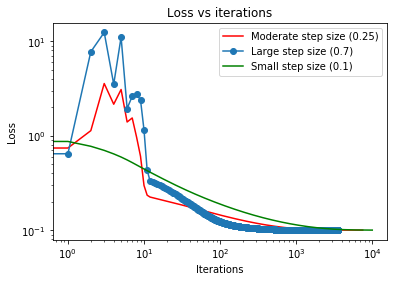

In [301]:
# Plots
plt.plot(lr_digit.trace_steps, lr_digit.trace_loss, 'r-', label = 'Moderate step size (0.25)')
plt.plot(lr_digit_big.trace_steps, lr_digit_big.trace_loss, 'o-', label = 'Large step size (0.7)')
plt.plot(lr_digit_small.trace_steps, lr_digit_small.trace_loss, 'g-', label = 'Small step size (0.1)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs iterations')

Text(0.5,1,'L1 norm grad vs iterations')

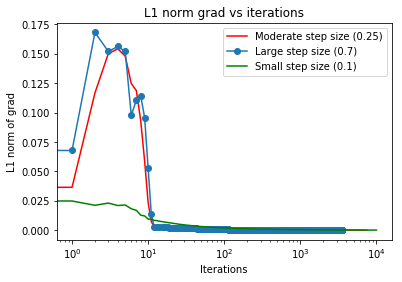

In [325]:
plt.plot(lr_digit.trace_steps, lr_digit.trace_L1_norm_of_grad , 'r-', label = 'Moderate step size (0.25)')
plt.plot(lr_digit_big.trace_steps , lr_digit_big.trace_L1_norm_of_grad , 'o-', label = 'Large step size (0.7)')
plt.plot(lr_digit_small.trace_steps , lr_digit_small.trace_L1_norm_of_grad , 'g-', label = 'Small step size (0.1)')
plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('L1 norm of grad')
plt.title('L1 norm grad vs iterations')

Text(0.5,1,'Learned values of weights vs iterations')

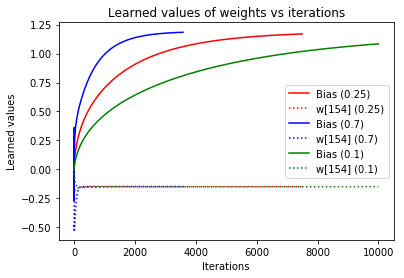

In [323]:
plt.plot(lr_digit.trace_steps, lr_w_bias , 'r-', label = 'Bias (0.25)')
plt.plot(lr_digit.trace_steps, lr_w_154 , 'r:', label = 'w[154] (0.25)')
plt.plot(lr_digit_big.trace_steps, lr_big_w_bias , 'b-', label = 'Bias (0.7)')
plt.plot(lr_digit_big.trace_steps, lr_big_w_154 , 'b:', label = 'w[154] (0.7)')
plt.plot(lr_digit_small.trace_steps, lr_small_w_bias , 'g-', label = 'Bias (0.1)')
plt.plot(lr_digit_small.trace_steps, lr_small_w_154 , 'g:', label = 'w[154] (0.1)')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Learned values')
plt.title('Learned values of weights vs iterations')

## Problem 2b

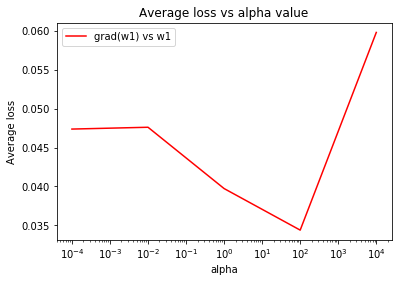

In [292]:
avg_loss = [(0.0503 + 0.0465+ 0.0453)/3 , (0.0508+0.0465+0.0455)/3 , (0.0399+0.0399+0.0394)/3 , (0.0386+0.031+0.0336)/3 , (0.0669+0.06+0.0524)/3]
weights_2b = [0.0001,0.01,1,100,10000]
plt.plot(weights_2b, avg_loss, 'r-', label = 'grad(w1) vs w1')
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('Average loss')
plt.title('Average loss vs alpha value')
plt.legend()


## Problem 2c

In [36]:
#Load in weights from alpha = 100, fold 1
x_tr_NF_alpha = x_NF_p2[3935:]
y_tr_N_alpha = y_N_p2[3935:]
x_va_NF_alpha = x_NF_p2[0:3935]
y_va_N_alpha = y_N_p2[0:3935]
lr_alpha = LogisticRegressionGradientDescent(alpha=100, step_size=0.1, init_w_recipe='zeros')
lr_alpha.fit(x_tr_NF_alpha,y_tr_N_alpha)



Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.025009  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.868444  avg_L1_norm_grad         0.025130  w[0]   -0.000 bias    0.000
iter    2/10000  loss         0.771051  avg_L1_norm_grad         0.021676  w[0]    0.000 bias    0.009
iter    3/10000  loss         0.697727  avg_L1_norm_grad         0.023485  w[0]   -0.000 bias    0.005
iter    4/10000  loss         0.640231  avg_L1_norm_grad         0.021579  w[0]    0.000 bias    0.016
iter    5/10000  loss         0.593415  avg_L1_norm_grad         0.021882  w[0]   -0.000 bias    0.010
iter    6/10000  loss         0.552944  avg_L1_norm_grad         0.018520  w[0]    0.000 bias    0.021
iter    7/10000  loss         0.518612  avg_L1_norm_grad         0.016926  w[0]   -0.000 bias    0.016
iter    8/10000  loss         0.489220  avg_L1_norm_grad

iter  620/10000  loss         0.199688  avg_L1_norm_grad         0.000135  w[0]   -0.017 bias    0.261
iter  621/10000  loss         0.199685  avg_L1_norm_grad         0.000134  w[0]   -0.017 bias    0.261
iter  640/10000  loss         0.199643  avg_L1_norm_grad         0.000127  w[0]   -0.017 bias    0.263
iter  641/10000  loss         0.199641  avg_L1_norm_grad         0.000126  w[0]   -0.017 bias    0.263
iter  660/10000  loss         0.199604  avg_L1_norm_grad         0.000119  w[0]   -0.018 bias    0.265
iter  661/10000  loss         0.199602  avg_L1_norm_grad         0.000119  w[0]   -0.018 bias    0.265
iter  680/10000  loss         0.199569  avg_L1_norm_grad         0.000112  w[0]   -0.018 bias    0.266
iter  681/10000  loss         0.199567  avg_L1_norm_grad         0.000112  w[0]   -0.018 bias    0.266
iter  700/10000  loss         0.199538  avg_L1_norm_grad         0.000105  w[0]   -0.018 bias    0.268
iter  701/10000  loss         0.199536  avg_L1_norm_grad         0.000105

iter 1420/10000  loss         0.199285  avg_L1_norm_grad         0.000016  w[0]   -0.021 bias    0.292
iter 1421/10000  loss         0.199285  avg_L1_norm_grad         0.000016  w[0]   -0.021 bias    0.292
iter 1440/10000  loss         0.199285  avg_L1_norm_grad         0.000015  w[0]   -0.021 bias    0.292
iter 1441/10000  loss         0.199285  avg_L1_norm_grad         0.000015  w[0]   -0.021 bias    0.292
iter 1460/10000  loss         0.199284  avg_L1_norm_grad         0.000014  w[0]   -0.021 bias    0.292
iter 1461/10000  loss         0.199284  avg_L1_norm_grad         0.000014  w[0]   -0.021 bias    0.292
iter 1480/10000  loss         0.199284  avg_L1_norm_grad         0.000014  w[0]   -0.021 bias    0.293
iter 1481/10000  loss         0.199284  avg_L1_norm_grad         0.000014  w[0]   -0.021 bias    0.293
iter 1500/10000  loss         0.199283  avg_L1_norm_grad         0.000013  w[0]   -0.021 bias    0.293
iter 1501/10000  loss         0.199283  avg_L1_norm_grad         0.000013

NameError: name 'ytrue_N' is not defined

In [67]:
yhat = lr_alpha.predict(x_va_NF_alpha)

#Confusion matrix:
cm = sm.confusion_matrix(y_va_N_alpha, yhat >= 0.5)
cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'
print(cm_df)

Predicted     0     1
True                 
0          1860    62
1            69  1944


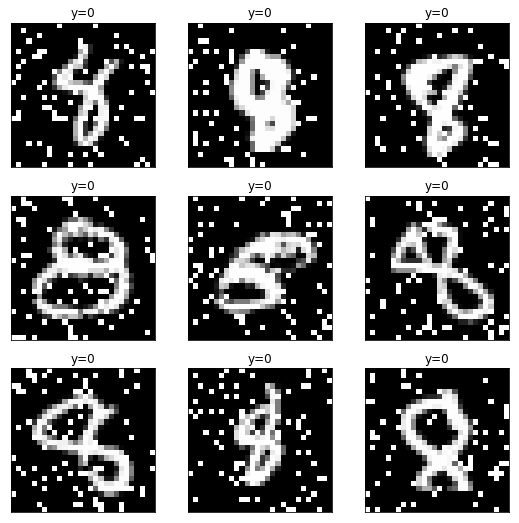

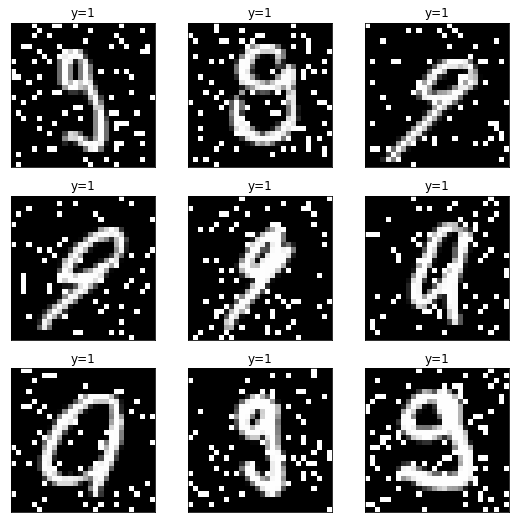

In [93]:
#print(x_va_NF_alpha[9])
false_pos = np.where(yhat > y_va_N_alpha)
false_neg = np.where(yhat < y_va_N_alpha)
false_pos = false_pos[0]
false_neg = false_neg[0]
#print(false_pos)
#print(false_neg)
pos_img_x = []
pos_img_y = []
neg_img_x = []
neg_img_y = []
for i in false_pos:
    pos_img_x.append(x_va_NF_alpha[i])
    pos_img_y.append(y_va_N_alpha[i])
for i in false_neg[:9]:
    neg_img_x.append(x_va_NF_alpha[i])
    neg_img_y.append(y_va_N_alpha[i])
#print(pos_img_x[0])
fpos = show_images(pos_img_x, pos_img_y)
fneg = show_images(neg_img_x, neg_img_y)
plt.show()

Comments for 2C): In general, as 

## Problem 2d

784


IndexError: list index out of range

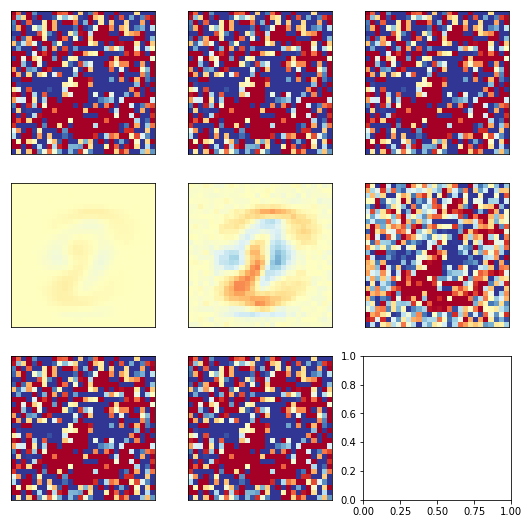

In [132]:
weights = np.loadtxt('results/alpha0100.0000_fold01_weights.txt', delimiter=' ', skiprows=0)
weights_large = np.loadtxt('results/alpha0000.0001_fold01_weights.txt', delimiter=' ', skiprows=0)
weights_small = np.loadtxt('results/alpha10000.0000_fold01_weights.txt', delimiter=' ', skiprows=0)
weights_0p1 = np.loadtxt('results/alpha0000.0100_fold01_weights.txt', delimiter=' ', skiprows=0)
weights_1 = np.loadtxt('results/alpha0001.0000_fold01_weights.txt', delimiter=' ', skiprows=0)
w_G_alpha = weights[:-1]
w_G_small = weights_small[:-1]
w_G_large = weights_large[:-1]
w_G_p1 = weights_0p1[:-1]
w_G_1 = weights_1[:-1]
w_G = [w_G_large,w_G_large,w_G_small, w_G_alpha, w_G_1, w_G_p1, w_G_large]
print(len(w_G_alpha))
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
for ii in range(9):
    cur_ax = axes.flatten()[ii]
    cur_ax.imshow(w_G[ii-1].reshape(28,28), interpolation='nearest', vmin=-0.5, vmax=0.5, cmap='RdYlBu')
    cur_ax.set_xticks([])
    cur_ax.set_yticks([])
#         cur_ax.set_title('y=%d' % y[ii])

## Problem 2e

In [221]:
x_2e = np.loadtxt('data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
y_e = np.loadtxt('data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
lr_2e = LogisticRegressionGradientDescent(alpha=100, step_size=0.1)
lr_2e.fit(x_2e,y_e)
x_test_NF = np.loadtxt('data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
yproba1_test_N = lr_2e.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.024599  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.869513  avg_L1_norm_grad         0.024392  w[0]   -0.000 bias    0.001
iter    2/10000  loss         0.772314  avg_L1_norm_grad         0.020545  w[0]    0.000 bias    0.008
iter    3/10000  loss         0.698702  avg_L1_norm_grad         0.022162  w[0]    0.000 bias    0.006
iter    4/10000  loss         0.641098  avg_L1_norm_grad         0.019836  w[0]    0.001 bias    0.015
iter    5/10000  loss         0.594355  avg_L1_norm_grad         0.020380  w[0]    0.000 bias    0.011
iter    6/10000  loss         0.554556  avg_L1_norm_grad         0.017193  w[0]    0.001 bias    0.021
iter    7/10000  loss         0.520744  avg_L1_norm_grad         0.016190  w[0]    0.001 bias    0.017
iter    8/10000  loss         0.491800  avg_L1_norm_grad

iter  620/10000  loss         0.181381  avg_L1_norm_grad         0.000198  w[0]   -0.018 bias    0.287
iter  621/10000  loss         0.181375  avg_L1_norm_grad         0.000198  w[0]   -0.018 bias    0.287
iter  640/10000  loss         0.181280  avg_L1_norm_grad         0.000188  w[0]   -0.018 bias    0.289
iter  641/10000  loss         0.181275  avg_L1_norm_grad         0.000188  w[0]   -0.018 bias    0.289
iter  660/10000  loss         0.181189  avg_L1_norm_grad         0.000179  w[0]   -0.019 bias    0.292
iter  661/10000  loss         0.181185  avg_L1_norm_grad         0.000179  w[0]   -0.019 bias    0.292
iter  680/10000  loss         0.181107  avg_L1_norm_grad         0.000171  w[0]   -0.019 bias    0.294
iter  681/10000  loss         0.181103  avg_L1_norm_grad         0.000170  w[0]   -0.019 bias    0.294
iter  700/10000  loss         0.181033  avg_L1_norm_grad         0.000162  w[0]   -0.019 bias    0.297
iter  701/10000  loss         0.181030  avg_L1_norm_grad         0.000162

iter 1420/10000  loss         0.180279  avg_L1_norm_grad         0.000037  w[0]   -0.026 bias    0.343
iter 1421/10000  loss         0.180279  avg_L1_norm_grad         0.000037  w[0]   -0.026 bias    0.343
iter 1440/10000  loss         0.180276  avg_L1_norm_grad         0.000035  w[0]   -0.026 bias    0.343
iter 1441/10000  loss         0.180276  avg_L1_norm_grad         0.000035  w[0]   -0.026 bias    0.343
iter 1460/10000  loss         0.180273  avg_L1_norm_grad         0.000034  w[0]   -0.026 bias    0.344
iter 1461/10000  loss         0.180272  avg_L1_norm_grad         0.000034  w[0]   -0.026 bias    0.344
iter 1480/10000  loss         0.180270  avg_L1_norm_grad         0.000033  w[0]   -0.026 bias    0.345
iter 1481/10000  loss         0.180270  avg_L1_norm_grad         0.000033  w[0]   -0.026 bias    0.345
iter 1500/10000  loss         0.180267  avg_L1_norm_grad         0.000032  w[0]   -0.026 bias    0.345
iter 1501/10000  loss         0.180267  avg_L1_norm_grad         0.000032

iter 2220/10000  loss         0.180233  avg_L1_norm_grad         0.000009  w[0]   -0.028 bias    0.358
iter 2221/10000  loss         0.180233  avg_L1_norm_grad         0.000009  w[0]   -0.028 bias    0.358
iter 2240/10000  loss         0.180232  avg_L1_norm_grad         0.000009  w[0]   -0.028 bias    0.358
iter 2241/10000  loss         0.180232  avg_L1_norm_grad         0.000009  w[0]   -0.028 bias    0.358
iter 2260/10000  loss         0.180232  avg_L1_norm_grad         0.000008  w[0]   -0.028 bias    0.359
iter 2261/10000  loss         0.180232  avg_L1_norm_grad         0.000008  w[0]   -0.028 bias    0.359
iter 2280/10000  loss         0.180232  avg_L1_norm_grad         0.000008  w[0]   -0.028 bias    0.359
iter 2281/10000  loss         0.180232  avg_L1_norm_grad         0.000008  w[0]   -0.028 bias    0.359
Done. Converged after 2296 iterations.


# Problem 3

In [135]:
x_SF = np.loadtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
y_S = np.loadtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)

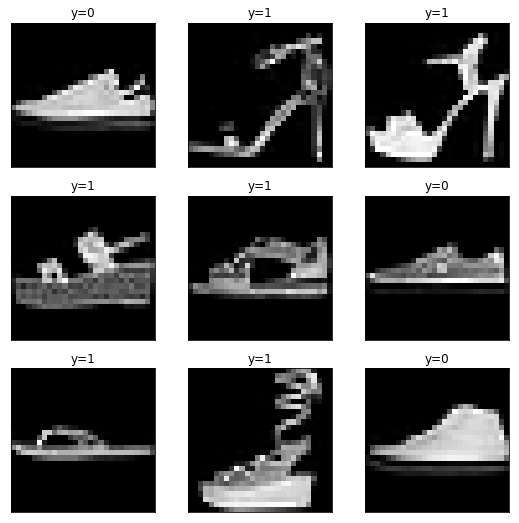

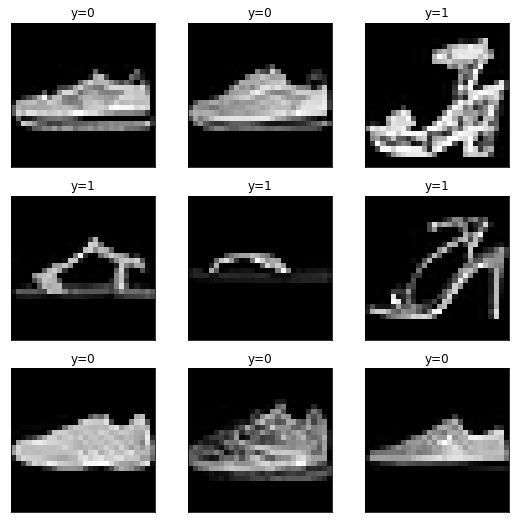

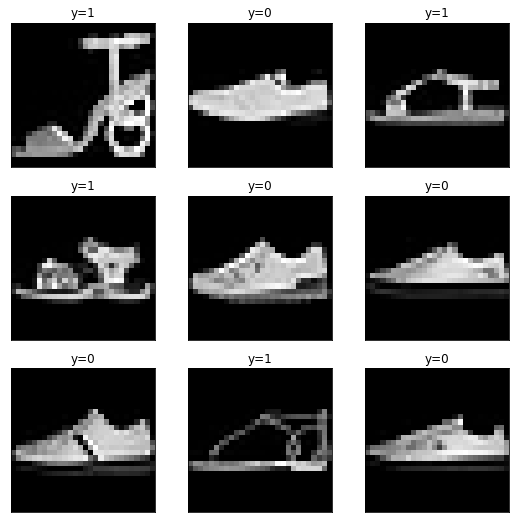

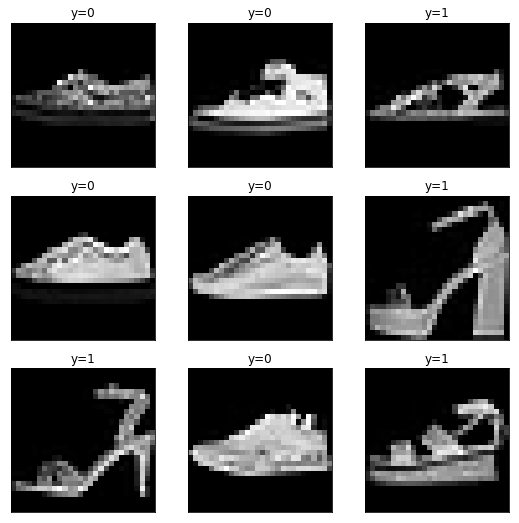

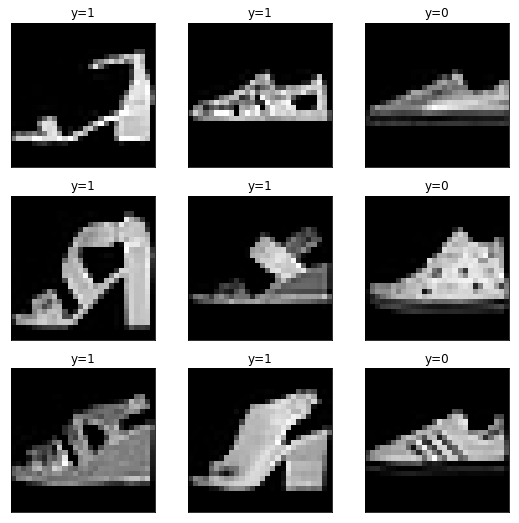

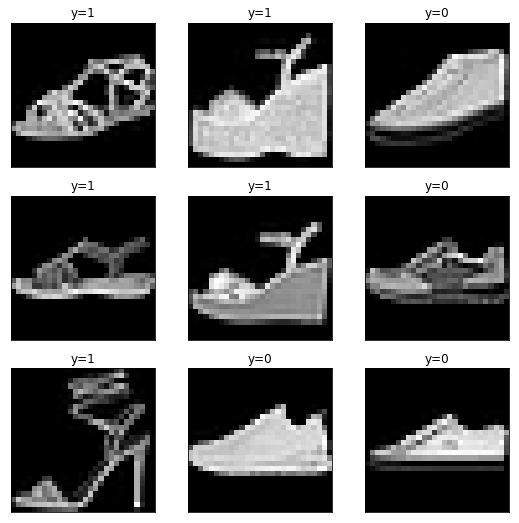

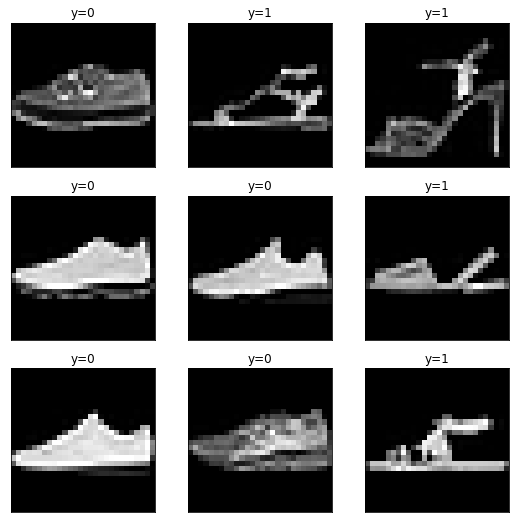

In [136]:
fneg = show_images(x_SF, y_S)
fneg = show_images(x_SF[10:19], y_S[10:19])
fneg = show_images(x_SF[20:29], y_S[20:29])
fneg = show_images(x_SF[30:39], y_S[30:39])
fneg = show_images(x_SF[40:49], y_S[40:49])
fneg = show_images(x_SF[50:59], y_S[50:59])
fneg = show_images(x_SF[60:69], y_S[60:69])
plt.show()

In [177]:
lr_shoe = LogisticRegressionGradientDescent(alpha=100.0, step_size=0.1)
lr_shoe.fit(x_SF, y_S)

Initializing w_G with 785 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.031943  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.905018  avg_L1_norm_grad         0.026338  w[0]    0.000 bias    0.000
iter    2/10000  loss         0.839647  avg_L1_norm_grad         0.018624  w[0]    0.000 bias    0.022
iter    3/10000  loss         0.796985  avg_L1_norm_grad         0.015870  w[0]    0.000 bias    0.028
iter    4/10000  loss         0.765567  avg_L1_norm_grad         0.012866  w[0]    0.000 bias    0.043
iter    5/10000  loss         0.741351  avg_L1_norm_grad         0.011733  w[0]    0.000 bias    0.053
iter    6/10000  loss         0.721433  avg_L1_norm_grad         0.010433  w[0]    0.000 bias    0.065
iter    7/10000  loss         0.704357  avg_L1_norm_grad         0.009763  w[0]    0.000 bias    0.075
iter    8/10000  loss         0.689274  avg_L1_norm_grad

iter  620/10000  loss         0.311856  avg_L1_norm_grad         0.000212  w[0]    0.000 bias    1.293
iter  621/10000  loss         0.311846  avg_L1_norm_grad         0.000212  w[0]    0.000 bias    1.294
iter  640/10000  loss         0.311667  avg_L1_norm_grad         0.000201  w[0]    0.000 bias    1.301
iter  641/10000  loss         0.311658  avg_L1_norm_grad         0.000201  w[0]    0.000 bias    1.301
iter  660/10000  loss         0.311499  avg_L1_norm_grad         0.000191  w[0]    0.000 bias    1.307
iter  661/10000  loss         0.311491  avg_L1_norm_grad         0.000190  w[0]    0.000 bias    1.308
iter  680/10000  loss         0.311347  avg_L1_norm_grad         0.000181  w[0]    0.000 bias    1.313
iter  681/10000  loss         0.311340  avg_L1_norm_grad         0.000181  w[0]    0.000 bias    1.314
iter  700/10000  loss         0.311211  avg_L1_norm_grad         0.000172  w[0]    0.000 bias    1.319
iter  701/10000  loss         0.311205  avg_L1_norm_grad         0.000172

iter 1420/10000  loss         0.309901  avg_L1_norm_grad         0.000040  w[0]    0.000 bias    1.396
iter 1421/10000  loss         0.309900  avg_L1_norm_grad         0.000040  w[0]    0.000 bias    1.396
iter 1440/10000  loss         0.309895  avg_L1_norm_grad         0.000038  w[0]    0.000 bias    1.396
iter 1441/10000  loss         0.309895  avg_L1_norm_grad         0.000038  w[0]    0.000 bias    1.396
iter 1460/10000  loss         0.309890  avg_L1_norm_grad         0.000037  w[0]    0.000 bias    1.397
iter 1461/10000  loss         0.309889  avg_L1_norm_grad         0.000037  w[0]    0.000 bias    1.397
iter 1480/10000  loss         0.309885  avg_L1_norm_grad         0.000036  w[0]    0.000 bias    1.397
iter 1481/10000  loss         0.309885  avg_L1_norm_grad         0.000036  w[0]    0.000 bias    1.397
iter 1500/10000  loss         0.309880  avg_L1_norm_grad         0.000035  w[0]    0.000 bias    1.398
iter 1501/10000  loss         0.309880  avg_L1_norm_grad         0.000034

iter 2220/10000  loss         0.309822  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.403
iter 2221/10000  loss         0.309822  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.403
Done. Converged after 2223 iterations.


In [140]:
yproba1_orig_N = lr_shoe.predict_proba(x_SF)[:,1]
print("Training Error with orig features: %.3f" % (
        np.mean(np.logical_xor(y_S, yproba1_orig_N >= 0.5))))

Training Error with orig features: 0.047


In [227]:
feature_avg_lum = []
loc_lum = []
for i in x_SF:
    for x in np.where(i > 0)[0]:
        loc_lum.append(i[x])
    feature_avg_lum.append(np.average(i))
x_SF_f1 = np.hstack([x_SF,np.array(feature_avg_lum)[:,np.newaxis]])
# print(x_SF_f1[1000])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [230]:
lr_shoe_f1 = LogisticRegressionGradientDescent(alpha=100, step_size=0.1)
lr_shoe_f1.fit(x_SF_f1, y_S)

Initializing w_G with 786 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.031917  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.905046  avg_L1_norm_grad         0.026343  w[0]    0.000 bias    0.000
iter    2/10000  loss         0.839666  avg_L1_norm_grad         0.018614  w[0]    0.000 bias    0.022
iter    3/10000  loss         0.796994  avg_L1_norm_grad         0.015873  w[0]    0.000 bias    0.028
iter    4/10000  loss         0.765564  avg_L1_norm_grad         0.012854  w[0]    0.000 bias    0.043
iter    5/10000  loss         0.741344  avg_L1_norm_grad         0.011727  w[0]    0.000 bias    0.053
iter    6/10000  loss         0.721424  avg_L1_norm_grad         0.010422  w[0]    0.000 bias    0.065
iter    7/10000  loss         0.704348  avg_L1_norm_grad         0.009755  w[0]    0.000 bias    0.075
iter    8/10000  loss         0.689266  avg_L1_norm_grad

iter  620/10000  loss         0.311855  avg_L1_norm_grad         0.000212  w[0]    0.000 bias    1.293
iter  621/10000  loss         0.311845  avg_L1_norm_grad         0.000211  w[0]    0.000 bias    1.294
iter  640/10000  loss         0.311666  avg_L1_norm_grad         0.000201  w[0]    0.000 bias    1.301
iter  641/10000  loss         0.311658  avg_L1_norm_grad         0.000200  w[0]    0.000 bias    1.301
iter  660/10000  loss         0.311498  avg_L1_norm_grad         0.000191  w[0]    0.000 bias    1.307
iter  661/10000  loss         0.311490  avg_L1_norm_grad         0.000190  w[0]    0.000 bias    1.308
iter  680/10000  loss         0.311346  avg_L1_norm_grad         0.000181  w[0]    0.000 bias    1.313
iter  681/10000  loss         0.311339  avg_L1_norm_grad         0.000180  w[0]    0.000 bias    1.314
iter  700/10000  loss         0.311210  avg_L1_norm_grad         0.000172  w[0]    0.000 bias    1.319
iter  701/10000  loss         0.311204  avg_L1_norm_grad         0.000171

iter 1420/10000  loss         0.309900  avg_L1_norm_grad         0.000040  w[0]    0.000 bias    1.396
iter 1421/10000  loss         0.309899  avg_L1_norm_grad         0.000040  w[0]    0.000 bias    1.396
iter 1440/10000  loss         0.309894  avg_L1_norm_grad         0.000038  w[0]    0.000 bias    1.396
iter 1441/10000  loss         0.309894  avg_L1_norm_grad         0.000038  w[0]    0.000 bias    1.396
iter 1460/10000  loss         0.309889  avg_L1_norm_grad         0.000037  w[0]    0.000 bias    1.397
iter 1461/10000  loss         0.309888  avg_L1_norm_grad         0.000037  w[0]    0.000 bias    1.397
iter 1480/10000  loss         0.309884  avg_L1_norm_grad         0.000036  w[0]    0.000 bias    1.397
iter 1481/10000  loss         0.309884  avg_L1_norm_grad         0.000036  w[0]    0.000 bias    1.397
iter 1500/10000  loss         0.309879  avg_L1_norm_grad         0.000034  w[0]    0.000 bias    1.398
iter 1501/10000  loss         0.309879  avg_L1_norm_grad         0.000034

iter 2220/10000  loss         0.309821  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.403
iter 2221/10000  loss         0.309821  avg_L1_norm_grad         0.000011  w[0]    0.000 bias    1.403
Done. Converged after 2223 iterations.


In [231]:
yproba1_f1_N = lr_shoe_f1.predict_proba(x_SF_f1)[:,1]
print("Training Error with new features: %.3f" % (
np.mean(np.logical_xor(y_S, yproba1_f1_N >= 0.5))))

Training Error with new features: 0.047


In [232]:
flipped = []
for i in x_SF:
    y = np.array(i.copy()).reshape((28,28))
    flipped.append(np.flip(np.flip(y,axis = 0),axis=1).flatten())
x_flipped = np.array(flipped)

In [233]:
x_SF_f2 = np.hstack([x_SF_f1,x_flipped])
print(x_SF_f1.shape)
print(x_flipped.shape)
print(x_SF_f2.shape)

(12000, 785)
(12000, 784)
(12000, 1569)


In [234]:
lr_shoe_f2 = LogisticRegressionGradientDescent(alpha=100, step_size=0.1)
lr_shoe_f2.fit(x_SF_f2, y_S)

Initializing w_G with 1570 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.031950  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.968268  avg_L1_norm_grad         0.050356  w[0]    0.000 bias    0.000
iter    2/10000  loss         1.159411  avg_L1_norm_grad         0.072325  w[0]    0.000 bias    0.038
iter    3/10000  loss         1.627453  avg_L1_norm_grad         0.080973  w[0]    0.000 bias    0.004
iter    4/10000  loss         0.896194  avg_L1_norm_grad         0.052715  w[0]    0.000 bias    0.062
iter    5/10000  loss         1.088173  avg_L1_norm_grad         0.059218  w[0]    0.000 bias    0.040
iter    6/10000  loss         0.842368  avg_L1_norm_grad         0.050027  w[0]    0.000 bias    0.085
iter    7/10000  loss         0.965040  avg_L1_norm_grad         0.052144  w[0]    0.000 bias    0.064
iter    8/10000  loss         0.756583  avg_L1_norm_gra

iter  601/10000  loss         0.269391  avg_L1_norm_grad         0.000140  w[0]    0.000 bias    1.089
iter  620/10000  loss         0.269230  avg_L1_norm_grad         0.000134  w[0]    0.000 bias    1.096
iter  621/10000  loss         0.269221  avg_L1_norm_grad         0.000133  w[0]    0.000 bias    1.097
iter  640/10000  loss         0.269077  avg_L1_norm_grad         0.000127  w[0]    0.000 bias    1.103
iter  641/10000  loss         0.269070  avg_L1_norm_grad         0.000127  w[0]    0.000 bias    1.104
iter  660/10000  loss         0.268940  avg_L1_norm_grad         0.000121  w[0]    0.000 bias    1.110
iter  661/10000  loss         0.268933  avg_L1_norm_grad         0.000121  w[0]    0.000 bias    1.110
iter  680/10000  loss         0.268816  avg_L1_norm_grad         0.000116  w[0]    0.000 bias    1.116
iter  681/10000  loss         0.268810  avg_L1_norm_grad         0.000115  w[0]    0.000 bias    1.117
iter  700/10000  loss         0.268704  avg_L1_norm_grad         0.000110

iter 1401/10000  loss         0.267596  avg_L1_norm_grad         0.000027  w[0]    0.000 bias    1.212
iter 1420/10000  loss         0.267591  avg_L1_norm_grad         0.000026  w[0]    0.000 bias    1.213
iter 1421/10000  loss         0.267590  avg_L1_norm_grad         0.000026  w[0]    0.000 bias    1.213
iter 1440/10000  loss         0.267586  avg_L1_norm_grad         0.000026  w[0]    0.000 bias    1.214
iter 1441/10000  loss         0.267585  avg_L1_norm_grad         0.000026  w[0]    0.000 bias    1.214
iter 1460/10000  loss         0.267581  avg_L1_norm_grad         0.000025  w[0]    0.000 bias    1.214
iter 1461/10000  loss         0.267581  avg_L1_norm_grad         0.000025  w[0]    0.000 bias    1.214
iter 1480/10000  loss         0.267577  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.215
iter 1481/10000  loss         0.267576  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.215
iter 1500/10000  loss         0.267573  avg_L1_norm_grad         0.000023

In [235]:
yproba1_f2_N = lr_shoe_f2.predict_proba(x_SF_f2)[:,1]
print("Training Error with new features: %.3f" % (
np.mean(np.logical_xor(y_S, yproba1_f2_N >= 0.5))))

Training Error with new features: 0.044


In [330]:
ratio = []
height_x = []
length_x = []
scaler = pr.MinMaxScaler()
for i in x_SF:
    height=[]
    length=[]
    pix = np.array(i.copy()).reshape((28,28))
    for j in pix:
        l = np.where(j > 0)
        if l[0].size > 0:
            length.append(l[0][-1] - l[0][0])
        else:
            length.append(0)
    length_x.append(np.average(np.array(length)))
    pix = np.flip(np.flip(pix,axis = 0),axis=1)
    for j in pix: 
        h = np.where(j > 0)
        if h[0].size > 0:
            height.append(h[0][-1] - h[0][0])
        else:
            height.append(0)
    height_x.append(np.average(np.array(height)))
height_x = np.array(height_x)
height_x_scaled = scaler.fit_transform(height_x[:,np.newaxis])
length_x = np.array(length_x)
length_x_scaled = scaler.fit_transform(length_x[:,np.newaxis])
x_SF_f3 = np.hstack([x_SF_f2,height_x_scaled,length_x_scaled])
lr_shoe_f3 = LogisticRegressionGradientDescent(alpha=100, step_size=0.1)
lr_shoe_f3.fit(x_SF_f3,y_S)

Initializing w_G with 1572 features using recipe: zeros
Running up to 10000 iters of gradient descent with step_size 0.1
iter    0/10000  loss         1.000000  avg_L1_norm_grad         0.031928  w[0]    0.000 bias    0.000
iter    1/10000  loss         0.967845  avg_L1_norm_grad         0.050436  w[0]    0.000 bias    0.000
iter    2/10000  loss         1.162525  avg_L1_norm_grad         0.072693  w[0]    0.000 bias    0.038
iter    3/10000  loss         1.636354  avg_L1_norm_grad         0.081337  w[0]    0.000 bias    0.003
iter    4/10000  loss         0.896269  avg_L1_norm_grad         0.052869  w[0]    0.000 bias    0.062
iter    5/10000  loss         1.089984  avg_L1_norm_grad         0.059388  w[0]    0.000 bias    0.040
iter    6/10000  loss         0.842818  avg_L1_norm_grad         0.050229  w[0]    0.000 bias    0.085
iter    7/10000  loss         0.966864  avg_L1_norm_grad         0.052316  w[0]    0.000 bias    0.064
iter    8/10000  loss         0.756385  avg_L1_norm_gra

iter  601/10000  loss         0.269054  avg_L1_norm_grad         0.000140  w[0]    0.000 bias    1.058
iter  620/10000  loss         0.268896  avg_L1_norm_grad         0.000133  w[0]    0.000 bias    1.064
iter  621/10000  loss         0.268888  avg_L1_norm_grad         0.000133  w[0]    0.000 bias    1.065
iter  640/10000  loss         0.268746  avg_L1_norm_grad         0.000127  w[0]    0.000 bias    1.071
iter  641/10000  loss         0.268739  avg_L1_norm_grad         0.000127  w[0]    0.000 bias    1.071
iter  660/10000  loss         0.268611  avg_L1_norm_grad         0.000121  w[0]    0.000 bias    1.077
iter  661/10000  loss         0.268604  avg_L1_norm_grad         0.000121  w[0]    0.000 bias    1.078
iter  680/10000  loss         0.268489  avg_L1_norm_grad         0.000115  w[0]    0.000 bias    1.083
iter  681/10000  loss         0.268483  avg_L1_norm_grad         0.000115  w[0]    0.000 bias    1.083
iter  700/10000  loss         0.268379  avg_L1_norm_grad         0.000110

iter 1401/10000  loss         0.267277  avg_L1_norm_grad         0.000028  w[0]    0.000 bias    1.173
iter 1420/10000  loss         0.267271  avg_L1_norm_grad         0.000027  w[0]    0.000 bias    1.174
iter 1421/10000  loss         0.267271  avg_L1_norm_grad         0.000027  w[0]    0.000 bias    1.174
iter 1440/10000  loss         0.267266  avg_L1_norm_grad         0.000026  w[0]    0.000 bias    1.175
iter 1441/10000  loss         0.267266  avg_L1_norm_grad         0.000026  w[0]    0.000 bias    1.175
iter 1460/10000  loss         0.267261  avg_L1_norm_grad         0.000025  w[0]    0.000 bias    1.176
iter 1461/10000  loss         0.267261  avg_L1_norm_grad         0.000025  w[0]    0.000 bias    1.176
iter 1480/10000  loss         0.267257  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.177
iter 1481/10000  loss         0.267257  avg_L1_norm_grad         0.000024  w[0]    0.000 bias    1.177
iter 1500/10000  loss         0.267253  avg_L1_norm_grad         0.000023

In [331]:
yproba1_f3_N = lr_shoe_f3.predict_proba(x_SF_f3)[:,1]
print("Training Error with new features: %.3f" % (
np.mean(np.logical_xor(y_S, yproba1_f3_N >= 0.5))))

Training Error with new features: 0.044


In [336]:
x_te_shoe = np.loadtxt('data_sneaker_vs_sandal/x_test.csv', delimiter = ',', skiprows=1)
#Feature 1 preprocess for test
feature_avg_lum = []
loc_lum = []
for i in x_te_shoe:
    for x in np.where(i > 0)[0]:
        loc_lum.append(i[x])
    feature_avg_lum.append(np.average(i))
x_shoe_f1 = np.hstack([x_te_shoe,np.array(feature_avg_lum)[:,np.newaxis]])
# yproba1_test_shoe = lr_shoe_f1.predict_proba(x_shoe_f1)[:, 1]
# np.savetxt('yproba1_test.txt', yproba1_test_shoe)
#Feature 2 preprocess for test
flipped = []
for i in x_te_shoe:
    y = np.array(i.copy()).reshape((28,28))
    flipped.append(np.flip(np.flip(y,axis = 0),axis=1).flatten())
x_flipped = np.array(flipped)
x_shoe_f2 = np.hstack([x_shoe_f1,x_flipped])
#Feature 3:
ratio = []
height_x = []
length_x = []
scaler = pr.MinMaxScaler()
for i in x_te_shoe:
    height=[]
    length=[]
    pix = np.array(i.copy()).reshape((28,28))
    for j in pix:
        l = np.where(j > 0)
        if l[0].size > 0:
            length.append(l[0][-1] - l[0][0])
        else:
            length.append(0)
    length_x.append(np.average(np.array(length)))
    pix = np.flip(np.flip(pix,axis = 0),axis=1)
    for j in pix: 
        h = np.where(j > 0)
        if h[0].size > 0:
            height.append(h[0][-1] - h[0][0])
        else:
            height.append(0)
    height_x.append(np.average(np.array(height)))
height_x = np.array(height_x)
height_x_scaled = scaler.fit_transform(height_x[:,np.newaxis])
length_x = np.array(length_x)
length_x_scaled = scaler.fit_transform(length_x[:,np.newaxis])
x_shoe_f3 = np.hstack([x_shoe_f2,height_x_scaled,length_x_scaled])
#test on shoe
yproba1_test_shoe = lr_shoe_f3.predict_proba(x_shoe_f3)[:, 1]
np.savetxt('yproba1_test_shoe.txt', yproba1_test_shoe)



12000


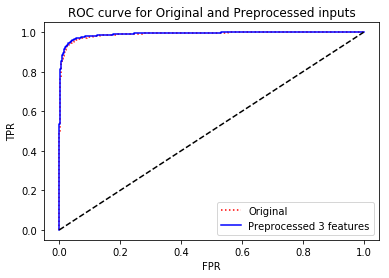

In [350]:

#ROC Curve Test
ypredict_pr = lr_shoe_f3.predict_proba(x_SF_f3)[:,1]
print(len(ypredict_pr))
roc_fpr_f3,roc_tpr_f3,_ = sm.roc_curve(y_S, ypredict_pr)
roc_fpr_f2, roc_tpr_f2, _ = sm.roc_curve(y_S, lr_shoe_f2.predict_proba(x_SF_f2)[:,1])
roc_fpr_f1, roc_tpr_f1, _ = sm.roc_curve(y_S, lr_shoe_f1.predict_proba(x_SF_f1)[:,1])
roc_fpr, roc_tpr, _ = sm.roc_curve(y_S, lr_shoe.predict_proba(x_SF)[:,1])

plt.plot(roc_fpr,roc_tpr,'r:',label='Original')
plt.plot(roc_fpr_f3,roc_tpr_f3,'b-',label ='Preprocessed 3 features')
# plt.plot(roc_fpr_f2,roc_tpr_f2,label ='Preprocessed 2 features')
# plt.plot(roc_fpr_f1,roc_tpr_f1,label ='Preprocessed 1 features')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Original and Preprocessed inputs')
plt.legend()

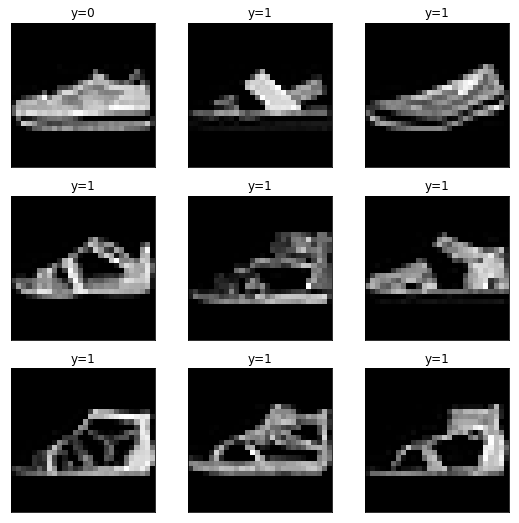

In [364]:
#False features og:
#False features for transformed:
yhat = lr_shoe.predict(x_SF)
#print(x_va_NF_alpha[9])
false_pos = np.where(yhat > y_S)
false_neg = np.where(yhat < y_S)
false_pos = false_pos[0]
false_neg = false_neg[0]
#print(false_pos)
#print(false_neg)
pos_img_x = []
pos_img_y = []
neg_img_x = []
neg_img_y = []
neg_img_x.append(x_SF[10])
neg_img_y.append(y_S[10])
for i in false_pos[5:]:
    pos_img_x.append(x_SF[i])
    pos_img_y.append(y_S[i])
for i in false_neg[18:27]:
    neg_img_x.append(x_SF[i])
    neg_img_y.append(y_S[i])
#print(pos_img_x[0])
# fpos = show_images(pos_img_x, pos_img_y)
fneg = show_images(neg_img_x, neg_img_y)
plt.show()

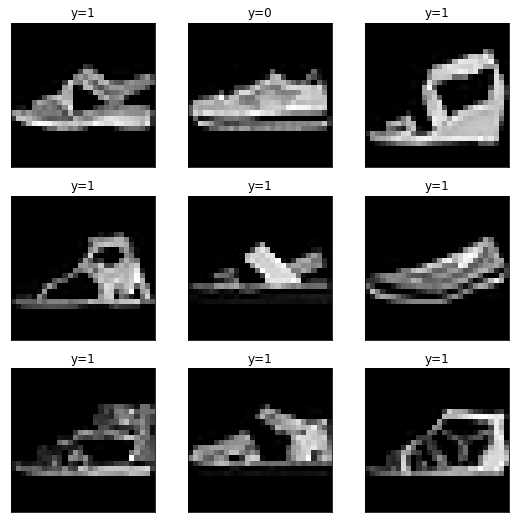

In [363]:
#False features for transformed:
yhat_pr = lr_shoe_f3.predict(x_SF_f3)
#print(x_va_NF_alpha[9])
false_pos = np.where(yhat_pr > y_S)
false_neg = np.where(yhat_pr < y_S)
false_pos = false_pos[0]
false_neg = false_neg[0]
#print(false_pos)
#print(false_neg)
pos_img_x = []
pos_img_y = []
neg_img_x = []
neg_img_y = []
neg_img_x.append(x_SF[9])
neg_img_y.append(y_S[9])
neg_img_x.append(x_SF[10])
neg_img_y.append(y_S[10])
for i in false_pos[5:]:
    pos_img_x.append(x_SF[i])
    pos_img_y.append(y_S[i])
for i in false_neg[18:27]:
    neg_img_x.append(x_SF[i])
    neg_img_y.append(y_S[i])
#print(pos_img_x[0])
# fpos = show_images(pos_img_x, pos_img_y)
fneg = show_images(neg_img_x, neg_img_y)
plt.show()